In [37]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn
import sklearn.datasets

In [38]:
# 产生花的图样
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
    # 转置将   
    X = X.T
    Y = Y.T

    return X, Y

In [39]:
# Sigmoid函数
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

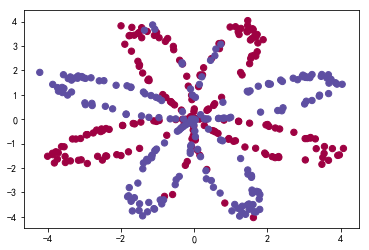

In [40]:
X, Y = load_planar_dataset()
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)
plt.show()

使用方法Logistic_regression分出花瓣颜色(一层隐藏层)

In [41]:
# 初始化参数
def initial_parameters(X, n_h, Y):
    n_x = X.shape[0]
    n_y = Y.shape[0]
    
    # 初始化W1,b1,W2,b2
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {
        "W1":W1,
        "b1":b1,
        "W2":W2,
        "b2":b2
    }
    return parameters

In [42]:
parameters = initial_parameters(X, 5, Y)
print(parameters["W1"].shape)

(5, 2)


In [44]:
# 前向forward
def forward_propagation(X, parameters):
    # W1,b1,W2,b2参数
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # 计算隐藏层值
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {
        "Z1":Z1,
        "A1":A1,
        "Z2":Z2,
        "A2":A2
    }
    return cache

In [45]:
cache = forward_propagation(X, parameters)

In [46]:
# 计算损失函数
def compute_cost(X, Y, cache):
    A2 = cache["A2"]
    # 样本数量
    m = X.shape[1]
    
    log_result = np.multiply(np.log(A2), Y) + np.multiply(np.log(1-A2), 1-Y)
    cost = - np.sum(log_result) / m
    
    return cost       

In [57]:
# 反向传播
def back_propagation(cache, X, Y, parameters, learning_rate=1.2):
    # 样本数量
    m = X.shape[1]
    
    # 权重和偏离值
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # 激活函数的值
    Z1 = cache["Z1"]
    A1 = cache["A1"]
    Z2 = cache["Z2"]
    A2 = cache["A2"]
    
    # 导数值(因为最后的激活函数是sigmoid)
    dZ2 = A2 - Y
    dW2  = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.square(A1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    
    # 更新权重和偏离值
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    
    parameters = {
        "W1":W1,
        "b1":b1,
        "W2":W2,
        "b2":b2
    }
    return parameters

In [68]:
def nn_model(X, Y,n_h, num_iterations=10000, learning_rate=1.2):
    parameters = initial_parameters(X, n_h, Y)
    # 初始值
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    for i in range(num_iterations):
        # 前向计算
        cache = forward_propagation(X, parameters)
        # 成本函数
        cost = compute_cost(X, Y, cache)
        # 后向更新权重
        parameters = back_propagation(cache, X, Y, parameters,learning_rate)
        
        if i % 1000 == 0:
            print("cost %d: %f" % (i,cost))      
    return parameters

In [84]:
n_h = 10
parameters = nn_model(X, Y, n_h)

cost 0: 0.693143
cost 1000: 0.282579
cost 2000: 0.261931
cost 3000: 0.250940
cost 4000: 0.244114
cost 5000: 0.239486
cost 6000: 0.236007
cost 7000: 0.233191
cost 8000: 0.230874
cost 9000: 0.228905


In [85]:
def predict(parameters, X_test):
    cache = forward_propagation(X_test, parameters)
    predictions = (cache["A2"] > 0.5)
    return predictions

In [86]:
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 91%
